# Problem Statement: Forecast the Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
airlines = pd.read_excel('Airlines+Data.xlsx')
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
airlines.rename({'Month':'Date'},axis=1,inplace=True)

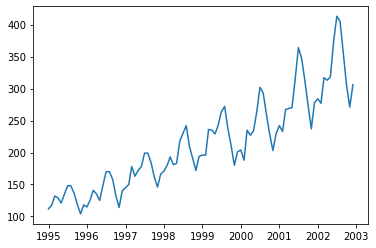

In [4]:
plt.plot('Date','Passengers',data=airlines)

In [5]:
# Extracting month and year
airlines["month"] = airlines.Date.dt.strftime("%b") # month extraction
airlines["year"] = airlines.Date.dt.strftime("%Y") # year extraction

month  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
year                                                             
1995   129  148  118  118  112  148  135  132  121  104  119  136
1996   135  170  140  126  115  170  149  141  125  114  133  158
1997   163  199  166  150  145  199  178  178  172  146  162  184
1998   181  242  194  180  171  230  218  193  183  172  191  209
1999   235  272  201  196  196  264  243  236  229  180  211  237
2000   227  293  229  188  204  302  264  235  234  203  229  259
2001   269  347  278  233  242  364  315  267  270  237  274  312
2002   313  405  306  277  284  413  374  317  318  271  306  355


<AxesSubplot:xlabel='month', ylabel='year'>

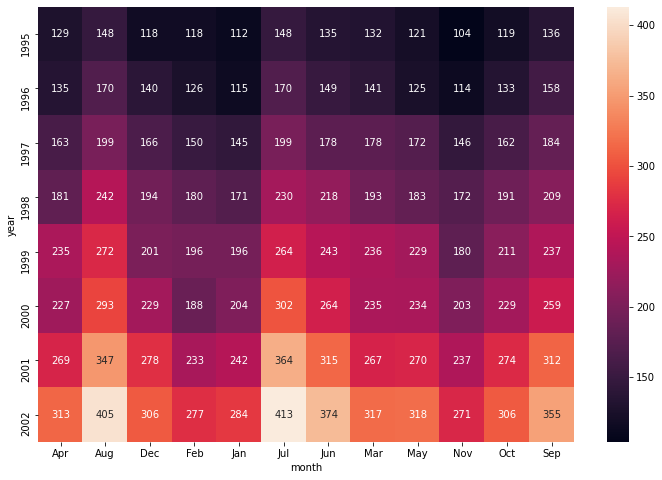

In [6]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=airlines,values="Passengers",index="year",columns="month",
                                 aggfunc="mean",fill_value=0)
print(heatmap_y_month)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot:xlabel='year', ylabel='Passengers'>

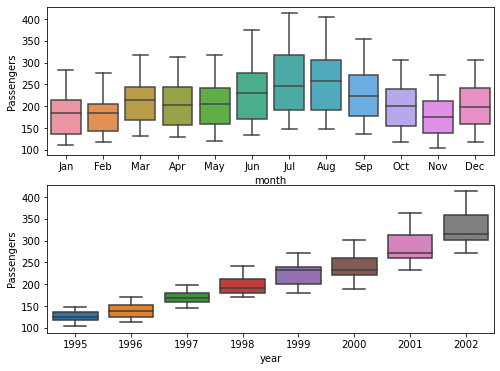

In [7]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=airlines)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=airlines)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

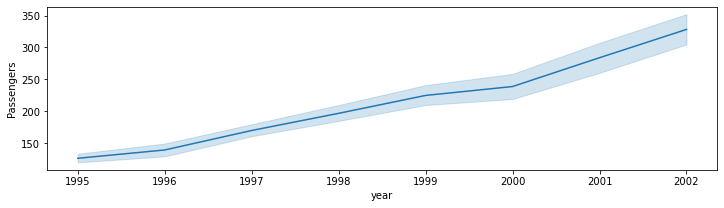

In [8]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=airlines)

## Time series decomposition plot

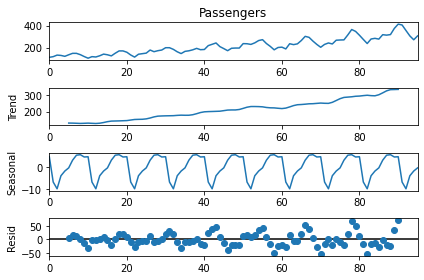

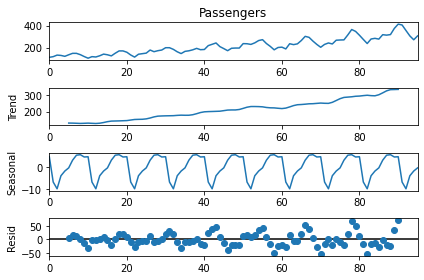

In [9]:
seasonal_ts_add=smf.tsa.seasonal_decompose(airlines["Passengers"],freq=10)
seasonal_ts_add.plot()

In [10]:
airlines.head()

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


In [11]:
dummies = pd.DataFrame(pd.get_dummies(airlines['month']))
data = pd.concat([airlines,dummies],axis = 1)

In [12]:
data

,Date,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [13]:
len(airlines)

96

In [14]:
data["t"] = np.arange(1,97)
data["t_square"] = data["t"]**2
data["log_Passengers"] = np.log(data["Passengers"])
data.head()

,Date,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


In [15]:
data.columns

Index(['Date', 'Passengers', 'month', 'year', 'Apr', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 't', 't_square',
       'log_Passengers'],
      dtype='object')

## Splitting data

In [16]:
train = data.head(80)
test = data.tail(16)

In [17]:
test

,Date,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
80,2001-09-01,312,Sep,2001,0,0,0,0,0,0,0,0,0,0,0,1,81,6561,5.743003
81,2001-10-01,274,Oct,2001,0,0,0,0,0,0,0,0,0,0,1,0,82,6724,5.613128
82,2001-11-01,237,Nov,2001,0,0,0,0,0,0,0,0,0,1,0,0,83,6889,5.468060
83,2001-12-01,278,Dec,2001,0,0,1,0,0,0,0,0,0,0,0,0,84,7056,5.627621
84,2002-01-01,284,Jan,2002,0,0,0,0,1,0,0,0,0,0,0,0,85,7225,5.648974
85,2002-02-01,277,Feb,2002,0,0,0,1,0,0,0,0,0,0,0,0,86,7396,5.624018
86,2002-03-01,317,Mar,2002,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902
87,2002-04-01,313,Apr,2002,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203
88,2002-05-01,318,May,2002,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051
89,2002-06-01,374,Jun,2002,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256


In [18]:
#Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.54262406772677

In [19]:
#Exponential

exp = smf.ols('log_Passengers~t',data=train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

43.79373939334308

In [20]:
#Quadratic 

quad = smf.ols('Passengers~t+t_square',data=train).fit()
pred_quad = pd.Series(quad.predict(test[["t","t_square"]]))
rmse_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_quad))**2))
rmse_quad

43.65440369584248

In [21]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.26647641443313

In [22]:
#Additive Seasonality Quadratic 

add_sea_quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.91098357010629

In [23]:
##Multiplicative Seasonality

mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_mult_sea = pd.Series(mul_sea.predict(test))
rmse_mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_sea

135.32648414621084

In [24]:
#Multiplicative Additive Seasonality 

mul_add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_mult_add_sea = pd.Series(mul_add_sea.predict(test))
rmse_mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mult_add_sea)))**2))
rmse_mult_add_sea 

9.469000230305973

In [25]:
#Compare the results 

df = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea])}
table_rmse=pd.DataFrame(df)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,9.469000
4,rmse_add_sea_quad,23.910984
2,rmse_Quad,43.654404
1,rmse_Exp,43.793739
0,rmse_linear,47.542624
3,rmse_add_sea,129.266476
5,rmse_Mult_sea,135.326484


### From the above RMSE values we can say that Multiplicative Additive Seasonality has the lowest score hence it will be the best model to use.

## Predicting new Data

In [26]:
new_data = [['2003-01-01', 'Jan'], ['2003-02-01', 'Feb'], ['2003-03-01', 'Mar'],['2003-04-01', 'Apr'],['2003-5-01', 'May'],['2003-06-01', 'Jun'],
        ['2003-07-01', 'Jul'],['2003-08-01', 'Aug'],['2003-09-01', 'Sep'],['2003-10-01', 'Oct'],['2003-11-01', 'Nov']]
data1 = pd.DataFrame(new_data, columns = ['Date', 'month'])
data1

,Date,month
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-5-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


In [27]:
dummies1 = pd.DataFrame(pd.get_dummies(data1['month']))
data1 = pd.concat([data1,dummies1],axis = 1)

In [28]:
data1

,Date,month,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2003-01-01,Jan,0,0,0,1,0,0,0,0,0,0,0
1,2003-02-01,Feb,0,0,1,0,0,0,0,0,0,0,0
2,2003-03-01,Mar,0,0,0,0,0,0,1,0,0,0,0
3,2003-04-01,Apr,1,0,0,0,0,0,0,0,0,0,0
4,2003-5-01,May,0,0,0,0,0,0,0,1,0,0,0
5,2003-06-01,Jun,0,0,0,0,0,1,0,0,0,0,0
6,2003-07-01,Jul,0,0,0,0,1,0,0,0,0,0,0
7,2003-08-01,Aug,0,1,0,0,0,0,0,0,0,0,0
8,2003-09-01,Sep,0,0,0,0,0,0,0,0,0,0,1
9,2003-10-01,Oct,0,0,0,0,0,0,0,0,0,1,0


In [29]:
len(data1)

11

In [30]:
data1["t"] = np.arange(97,108)
data1["t_square"] = data1["t"]**2
data1.tail()

,Date,month,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square
6,2003-07-01,Jul,0,0,0,0,1,0,0,0,0,0,0,103,10609
7,2003-08-01,Aug,0,1,0,0,0,0,0,0,0,0,0,104,10816
8,2003-09-01,Sep,0,0,0,0,0,0,0,0,0,0,1,105,11025
9,2003-10-01,Oct,0,0,0,0,0,0,0,0,0,1,0,106,11236
10,2003-11-01,Nov,0,0,0,0,0,0,0,0,1,0,0,107,11449


In [31]:
#Multiplicative Additive Seasonality 

mul_add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = data).fit()
pred_new_data = pd.Series(mul_add_sea.predict(data1))
rmse_mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mult_add_sea)))**2))
rmse_mult_add_sea 

9.469000230305973

In [32]:
model = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = data).fit()

In [33]:
pred_new  = pd.Series(model.predict(data1))
pred_new

0     5.770755
1     5.781280
2     5.924459
3     5.891606
4     5.885083
5     6.008926
6     6.115180
7     6.113063
8     6.002824
9     5.872713
10    5.742262
dtype: float64

In [34]:
data1

,Date,month,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square
0,2003-01-01,Jan,0,0,0,1,0,0,0,0,0,0,0,97,9409
1,2003-02-01,Feb,0,0,1,0,0,0,0,0,0,0,0,98,9604
2,2003-03-01,Mar,0,0,0,0,0,0,1,0,0,0,0,99,9801
3,2003-04-01,Apr,1,0,0,0,0,0,0,0,0,0,0,100,10000
4,2003-5-01,May,0,0,0,0,0,0,0,1,0,0,0,101,10201
5,2003-06-01,Jun,0,0,0,0,0,1,0,0,0,0,0,102,10404
6,2003-07-01,Jul,0,0,0,0,1,0,0,0,0,0,0,103,10609
7,2003-08-01,Aug,0,1,0,0,0,0,0,0,0,0,0,104,10816
8,2003-09-01,Sep,0,0,0,0,0,0,0,0,0,0,1,105,11025
9,2003-10-01,Oct,0,0,0,0,0,0,0,0,0,1,0,106,11236


In [35]:
data1["Forecasted_log"] = pd.Series(pred_new)
data1['Forecasted_Passengers'] = np.exp(data1['Forecasted_log'])

In [36]:
new_var = pd.concat([data,data1])

<AxesSubplot:>

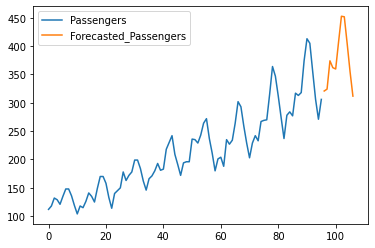

In [37]:
new_var[['Passengers','Forecasted_Passengers']].reset_index(drop=True).plot()